# Contents 

01. Importing libraries and data
02. Elbow technique
03. K-means clustering
04. Standardization

## 01. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # imports the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensures graphs are displayed in notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# importing 2015 RECS data

path = r'/Users/lindazhang/RECS Analysis'
df_recs = pd.read_csv(os.path.join(path, '02 Datasets', 'Original Data', '2015_RECS_data.csv'), index_col = False)

In [4]:
# Creating a subset 

subset = df_recs[['TOTALBTUSPH','BTUELCOL', 'TOTALBTU','HDD65', 'CDD65']]
# renaming columns 

dict = {'TOTALBTUSPH':'total_heating_usage',
'BTUELCOL': 'total_cooling_usage',
'TOTALBTU': 'total_energy_used',
'HDD65': 'total_heating_days_2015',
'CDD65': 'total_cooling_days_2015',
}

subset.rename(columns = dict, inplace = True)



/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_10467/3567703879.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.rename(columns = dict, inplace = True)


In [5]:
subset.describe()

,total_heating_usage,total_cooling_usage,total_energy_used,total_heating_days_2015,total_cooling_days_2015
count,5686.000000,5686.000000,5686.000000,5686.000000,5686.00000
mean,33039.198544,6338.705352,77722.892022,3707.848751,1719.20612
std,33492.607918,7632.061859,46962.309685,2149.272713,1193.56296
min,0.000000,0.000000,201.574000,0.000000,0.00000
25%,7158.248750,1284.097500,42655.828000,1881.000000,793.00000
50%,21845.190000,3731.263000,68663.346000,3877.500000,1378.00000
75%,49450.211000,8621.248750,103832.874500,5467.000000,2231.00000
max,277614.771000,69447.250000,490187.407000,9843.000000,6607.00000


### 02. The elbow technique

In [6]:
num_cl = range(1, 5) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
score = [kmeans[i].fit(subset).score(subset) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-19280709620632.75,
 -7558540230632.965,
 -4738830129349.961,
 -3551613961780.952]

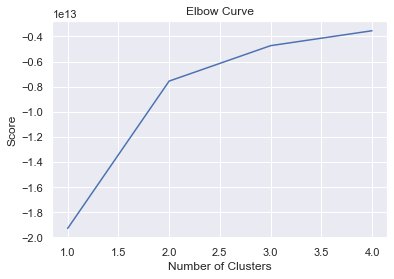

In [8]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 03. K-means clustering

In [9]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [10]:
# Fit the k-means object to the data.

kmeans.fit(subset)

KMeans(n_clusters=3)

In [11]:
subset['clusters'] = kmeans.fit_predict(subset)

/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_10467/100664328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['clusters'] = kmeans.fit_predict(subset)


In [12]:
subset['clusters'].value_counts()

1    2960
0    1978
2     748
Name: clusters, dtype: int64

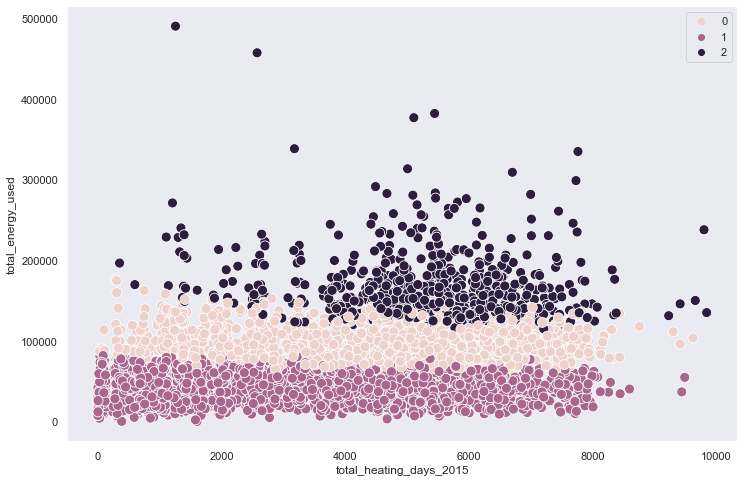

In [13]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=subset['total_heating_days_2015'], y=subset['total_energy_used'], hue=kmeans.labels_, s=100) 
# subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points we want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_heating_days_2015') 
plt.ylabel('total_energy_used') 
plt.show()

It appears that data is being clustered by total energy use. 

### 04. Standardizing Data

In [14]:
# Split data into a training set and a test set.

training_data, testing_data = train_test_split(subset, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 4548
No. of testing examples: 1138


In [15]:
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)
scaled_subset = scaler.transform(subset)

In [16]:
scaled_subset

array([[-0.61603768,  0.05036721, -0.61830536, -0.78259006,  0.04210791,
         0.33447775],
       [-0.64292071,  0.15290543, -0.77762852, -0.83647798,  0.90517881,
         0.33447775],
       [-0.28647023,  2.19015224,  0.40037664, -0.67481424,  0.43456566,
        -1.18369073],
       ...,
       [-0.95174824, -0.75982551, -1.40311204,  1.03380428, -0.65624839,
         0.33447775],
       [-0.69591279,  0.66048404, -0.64615625, -1.0580688 ,  1.46739345,
         0.33447775],
       [-0.27558482, -0.50672548, -0.87097913,  0.56600144, -0.27219444,
         0.33447775]])

In [17]:
scaled_subset = pd.DataFrame(scaled_subset,columns = subset.columns)
scaled_subset

,total_heating_usage,total_cooling_usage,total_energy_used,total_heating_days_2015,total_cooling_days_2015,clusters
0,-0.616038,0.050367,-0.618305,-0.782590,0.042108,0.334478
1,-0.642921,0.152905,-0.777629,-0.836478,0.905179,0.334478
2,-0.286470,2.190152,0.400377,-0.674814,0.434566,-1.183691
3,0.577314,0.731909,0.244838,0.017831,-0.289002,-1.183691
4,-0.829077,-0.682115,-0.883661,0.782947,-0.609187,0.334478
...,...,...,...,...,...,...
5681,-0.638615,-0.765735,-1.049453,1.279552,-0.912564,0.334478
5682,-0.796607,-0.451786,-1.186813,-0.559141,0.283297,0.334478
5683,-0.951748,-0.759826,-1.403112,1.033804,-0.656248,0.334478
5684,-0.695913,0.660484,-0.646156,-1.058069,1.467393,0.334478


In [18]:
kmeans = KMeans(n_clusters = 3) 

In [19]:
kmeans.fit(scaled_subset)


KMeans(n_clusters=3)

In [20]:
scaled_subset['clusters'] = kmeans.fit_predict(scaled_subset)

In [21]:
scaled_subset['clusters'].value_counts()

1    3140
0    1807
2     739
Name: clusters, dtype: int64

In [22]:
scaled_subset

,total_heating_usage,total_cooling_usage,total_energy_used,total_heating_days_2015,total_cooling_days_2015,clusters
0,-0.616038,0.050367,-0.618305,-0.782590,0.042108,0
1,-0.642921,0.152905,-0.777629,-0.836478,0.905179,0
2,-0.286470,2.190152,0.400377,-0.674814,0.434566,0
3,0.577314,0.731909,0.244838,0.017831,-0.289002,1
4,-0.829077,-0.682115,-0.883661,0.782947,-0.609187,1
...,...,...,...,...,...,...
5681,-0.638615,-0.765735,-1.049453,1.279552,-0.912564,1
5682,-0.796607,-0.451786,-1.186813,-0.559141,0.283297,0
5683,-0.951748,-0.759826,-1.403112,1.033804,-0.656248,1
5684,-0.695913,0.660484,-0.646156,-1.058069,1.467393,0


In [23]:
# exporting scaled_subset as excel file into prepared data folder 

scaled_subset.to_excel(os.path.join(path, '02 Datasets','Prepared Data', 'cluster_scaled_subset.xlsx'))

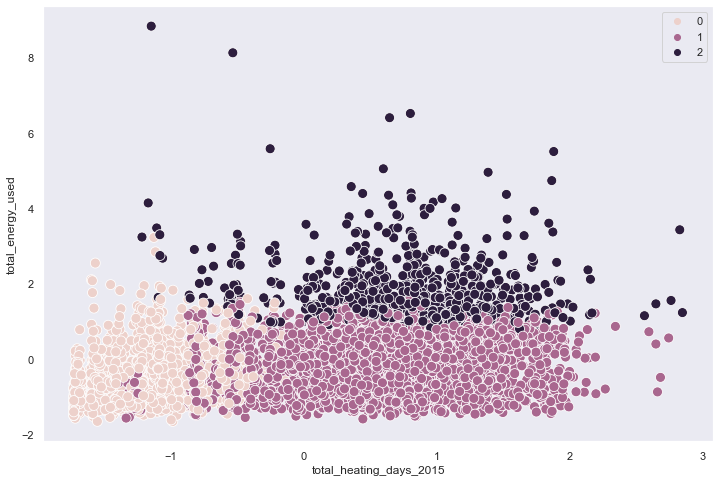

In [24]:
# plotting clusters for variables total_heating_days_2015 and total_energy_used

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_subset['total_heating_days_2015'], y=scaled_subset['total_energy_used'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('total_heating_days_2015')
plt.ylabel('total_energy_used') 
plt.show()

Cluster characteristics: 

* Cluster 0: Households that have a low number of heating days 
* Cluster 1: Households that have moderate - large number of heating days and use a low amount of total energy 
* Cluster 2: Households that have a moderate - large number of heating days and use a large amount of total energy



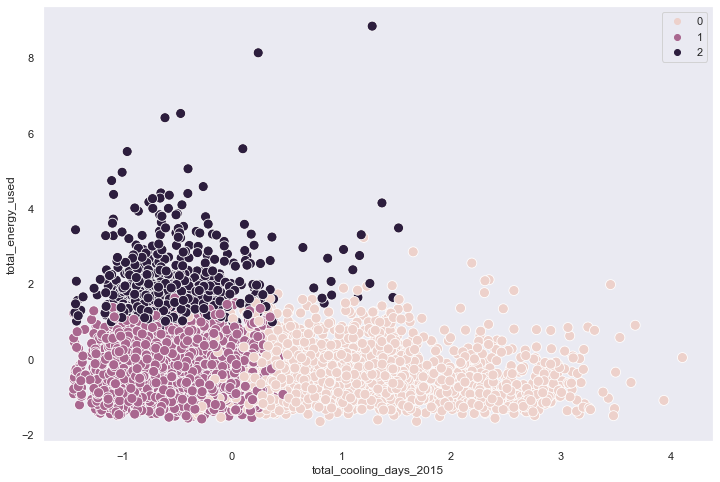

In [25]:
# plotting clusters for variables total_cooling_days_2015 vs total_energy_used

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=scaled_subset['total_cooling_days_2015'], y=scaled_subset['total_energy_used'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('total_cooling_days_2015')
plt.ylabel('total_energy_used') 
plt.show()

Cluster characteristics:

* Cluster 0: Households that have moderate - large number of cooling days 
* Cluster 1: Households that have a low number of cooling days and use a low amount of total energy 
* Cluster 2: Households that have a low number of cooling days and use a large amount of total energy



In [26]:
# obtain mean and median values for clusters on scaled subset

scaled_subset.groupby('clusters').agg({'total_heating_days_2015':['mean', 'median'], 
                         'total_cooling_days_2015':['mean', 'median'], 
                         'total_energy_used':['mean', 'median']})

total_heating_days_2015           total_cooling_days_2015            \
                            mean    median                    mean    median   
clusters                                                                       
0                      -1.114273 -1.104988                1.185643  1.063170   
1                       0.450250  0.451722               -0.550344 -0.599943   
2                       0.783746  0.819646               -0.552245 -0.640281   

         total_energy_used            
                      mean    median  
clusters                              
0                -0.393598 -0.487061  
1                -0.211508 -0.242849  
2                 1.840157  1.617847

Observations:

Cluster 0 has the lowest mean heating days and the highest mean cooling days, and the lowest mean energy use. 
Cluster 2 has the highest mean heating days, the lowest mean cooling days, and the highest mean energy use. 


In summary: 
* Cluster 0: Households that have a low number of heating days and a large number of cooling days and use a low amount of energy. 

* Cluster 1: Households that have moderate - large number of heating days, low number of cooling days and use a low amount of total energy. 

* Cluster 2: Households that have a large number of heating days, low number of cooling days and use a large amount of total energy.




In [27]:
# creating a dataframe of clusters from scaled_subset 

scaled_clusters = scaled_subset ['clusters']

In [28]:
# adding clusters from scaled subset to original dataset

subset['clusters'] = scaled_clusters

/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_10467/3095412059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['clusters'] = scaled_clusters


In [29]:
subset

,total_heating_usage,total_cooling_usage,total_energy_used,total_heating_days_2015,total_cooling_days_2015,clusters
0,12469.727,6795.016,48974.570,2031,1768,0
1,11570.020,7587.322,41534.000,1915,2795,0
2,23499.517,23328.992,96548.160,2263,2235,0
3,52408.189,12061.243,89284.345,3754,1374,1
4,5339.841,1135.176,36582.146,5401,993,1
...,...,...,...,...,...,...
5681,11714.119,489.049,28839.497,6470,632,1
5682,6426.518,2914.911,22424.616,2512,2055,0
5683,1234.343,534.711,12323.219,5941,937,1
5684,9796.509,11509.348,47673.902,1438,3464,0


In [30]:
# obtain mean and median values for clusters 

table = subset.groupby('clusters').agg({'total_heating_days_2015':['median'], 
                         'total_cooling_days_2015':['median'], 
                         'total_energy_used':['median'], 
                         'total_heating_usage':['median'],
                         'total_cooling_usage':['median']})

table

,total_heating_days_2015,total_cooling_days_2015,total_energy_used,total_heating_usage,total_cooling_usage
,median,median,median,median,median
clusters,,,,,
0,1337.0,2983.0,55103.849,7436.9590,10390.5000
1,4688.0,1004.0,66508.794,26038.0075,1956.5785
2,5480.0,956.0,153405.402,92894.7360,4812.1860


In [31]:
# exporting table as excel file into prepared data folder 

table.to_excel(os.path.join(path, '02 Datasets','Prepared Data', 'cluster_analysis_table.xlsx'))